In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

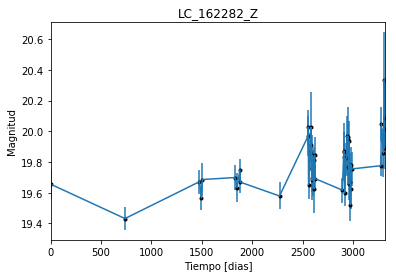

In [2]:
data = np.genfromtxt('LC_162282_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_162282_Z')
plt.savefig("LC_162282_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

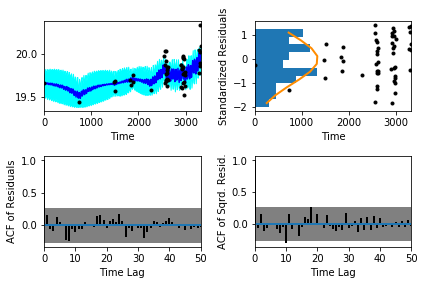

In [5]:
sample.assess_fit()

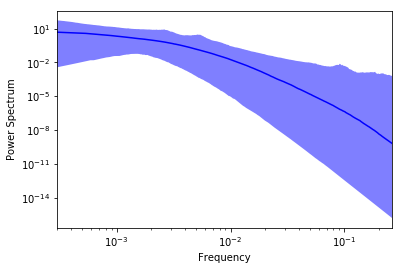

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

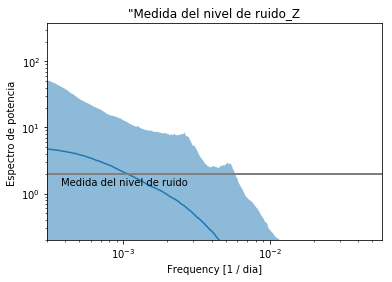

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_162282_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_162282_Z')

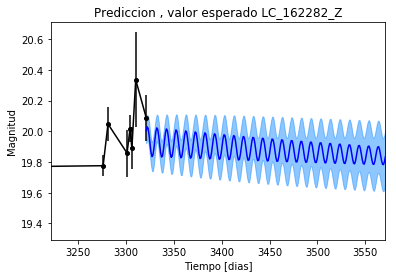

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_162282_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_162282_Z')

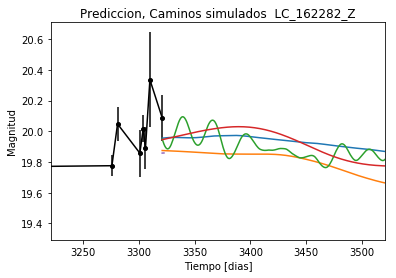

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_162282_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


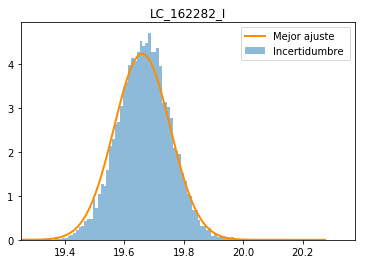

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_162282_I')
plt.savefig("Mejor_ajuste_LC_162282_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_162282_Z')

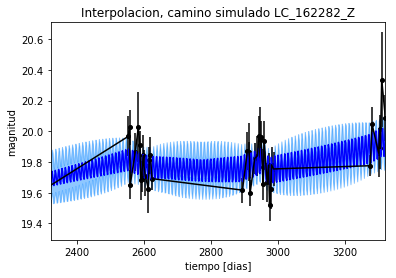

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_162282_Z')

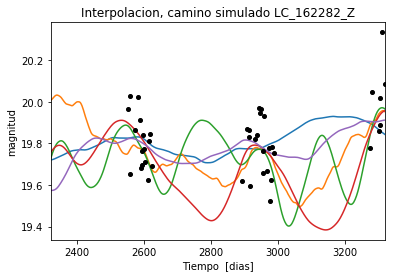

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_162282_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 758.045464178
Median: 0.00530278556224
Standard deviation: 0.0897651868068
68% credibility interval: [ 0.00066835  0.08212303]
95% credibility interval: [  3.30976201e-04   3.41017178e-01]
99% credibility interval: [  3.05379281e-04   4.92707215e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 280.698165782
Median: 0.00188735139264
Standard deviation: 0.046640416783
68% credibility interval: [ 0.00047828  0.01872828]
95% credibility interval: [ 0.00032004  0.16462233]
99% credibility interval: [  3.04447628e-04   3.07213496e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 352.146671591
Median: 0.0163523811954
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2048.21916015
Median: 48.8032223981
Standard deviation: 1.559463575
68% credibility interval: [ 47.08175315  49.80503555]
95% credibility interval: [ 44.51745994  50.68422219]
99% credibility interval: [ 42.65823109  51.52975114]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 823.473620237
Median: 0.419982897377
Standard deviation: 1.16633888567
68% credibility interval: [ 0.04808724  2.23817309]
95% credibility interval: [ 0.01519164  3.78200054]
99% credibility interval: [ 0.01025661  5.20607061]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 745.771639002
Median: 0.251867814481
Standard deviation: 2.33783007188
68% credibility interval: [ 0.00849077  2.86446823]
95% credibility interval: [  6.35224937e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6698.81986397
Median: 4.29233080765e-14
Standard deviation: 5.2313815366e+83
68% credibility interval: [  2.85062617e-56   4.61719019e+16]
95% credibility interval: [  5.00698428e-114   2.10582868e+056]
99% credibility interval: [  2.29993392e-120   1.63394295e+062]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2260.03609663
Median: 19.700761815
Standard deviation: 0.0746685481325
68% credibility interval: [ 19.63490247  19.75782596]
95% credibility interval: [ 19.54250016  19.83100281]
99% credibility interval: [ 19.45628     19.95398386]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 832.242336907
Median: 0.0121382340964
Standard deviation: 0.128230397042
68% credibility interval: [ 0.          0.21785962]
95% credibility interval: [ 0.          0.44730017]
99% credibility interval: [ 0.          0.50735065]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 832.242336907
Median: 0.0121382340964
Standard deviation: 0.128230397042
68% credibility interval: [ 0.          0.21785962]
95% credibility interval: [ 0.          0.44730017]
99% credibility interval: [ 0.          0.50735065]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1216.19153097
Median: 0.0
Standard deviation: 0.0060568001249
68% cred

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2048.21916015
Median: 48.8032223981
Standard deviation: 1.559463575
68% credibility interval: [ 47.08175315  49.80503555]
95% credibility interval: [ 44.51745994  50.68422219]
99% credibility interval: [ 42.65823109  51.52975114]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2317.37396197
Median: 0.020458923579
Standard deviation: 0.0295349833623
68% credibility interval: [ 0.01065856  0.04102859]
95% credibility interval: [ 0.00548547  0.09679519]
99% credibility interval: [ 0.00353911  0.17839431]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1847.62714519
Median: 1.08782048375
Standard deviation: 0.179447930204
68% credibility interval: [ 0.9274694   1.27711776]
95% credibility interval: [ 0.79631325  1.50354185]
99% credibility interval: [ 0.72616382  1.68320201]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 637.46919169
Median: 3.20691294116e-05
Standard deviation: 0.0309091725388
68% credibility interval: [  3.81505537e-20   2.57025610e-03]
95% credibility interval: [  2.12177028e-59   6.85484180e-02]
99% credibility interval: [  1.99896115e-66   1.84985684e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 758.045464178
Median: (-0.0333183843318-0.0713276672227j)
Standard deviation: 0.983490590352
68% credibility interval: [-0.51599422-0.45283998j -0.00419939-0.01170151j]
95% credibility interval: [ -2.14267412e+00+0.j          -2.07958480e-03-0.00082897j]
99% credibility interval: [ -3.09577074e+00+0.j         -1.91875461e-03-2.6824712j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 280.698165782
Median: (-0.0118585785397+0j)
Standard deviation: 0.857335125635
68% credibility interval: [-0.11767328+0.1079135j -0.00300512+0.j       ]
95% credibility interval: [-1.03435258+1.76307086j -0.00201089+0.j        ]
99% credibility interval: [ -1.93027932e+00+1.86347595j  -1.91290087e-03+0.03090566j]
Posterior summary for para